In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import os 
path=("D:/udemy_python")
os.chdir(path)
os.listdir(path)

['gender_submission.csv',
 'sample.csv',
 'test.csv',
 'train.csv',
 'winequality-red.csv']

In [3]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#find datatypes of titanic_df
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Basic Question needs to be answered


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

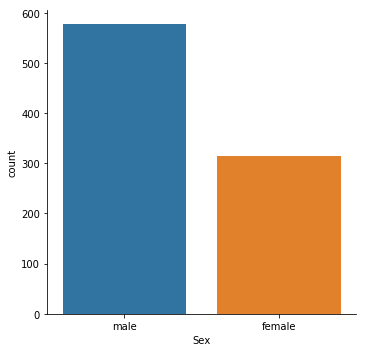

In [6]:
# 1. who were the passengers on the titanic?(ages,gender,class..etc)
# create factor plot 
sns.catplot('Sex',data=titanic_df,kind='count')

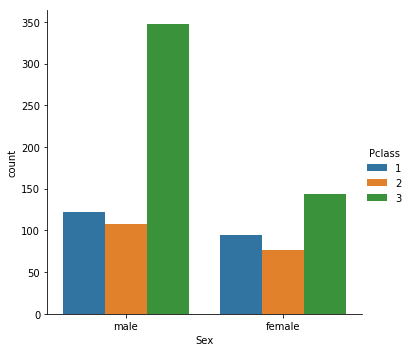

In [7]:
#check the sex survived based on pclass
sns.catplot("Sex",data=titanic_df,hue='Pclass',kind='count')

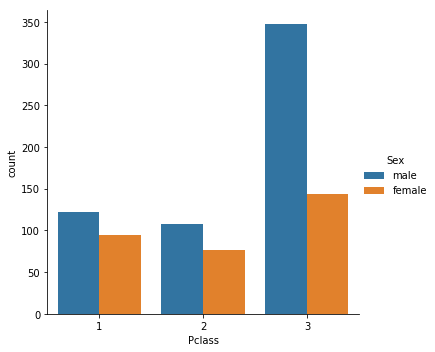

In [8]:
# showing the 'Pclass' based on 'Sex'
sns.catplot('Pclass',data=titanic_df,hue='Sex',kind='count')

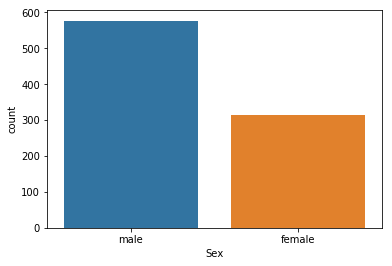

In [9]:
sns.countplot('Sex',data=titanic_df)

In [10]:
# Using apply function,find children,male,female
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex

In [11]:
titanic_df['Person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [12]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


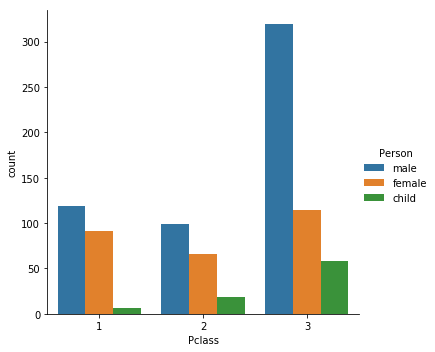

In [13]:
sns.catplot('Pclass',data=titanic_df,kind='count',hue='Person')

C:\Users\rahul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rahul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


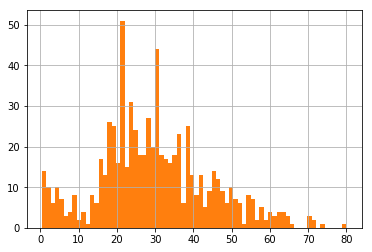

In [14]:
# Different Aged people
plt.hist(titanic_df['Age'],bins=70)

# or

titanic_df['Age'].hist(bins=70)

In [15]:
# find mean of Age
titanic_df['Age'].mean()

29.69911764705882

In [16]:
#shows number of male,child and female 
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64


# part 2

C:\Users\rahul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


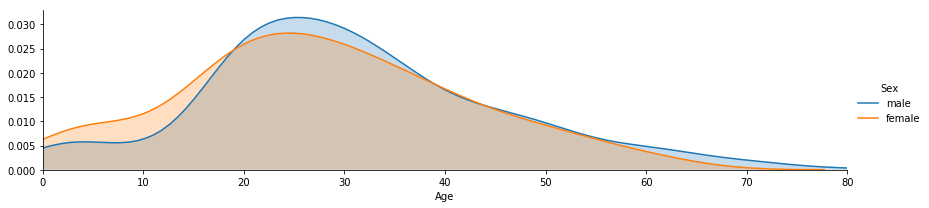

In [17]:
# kdeplot on ages and males vs female
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

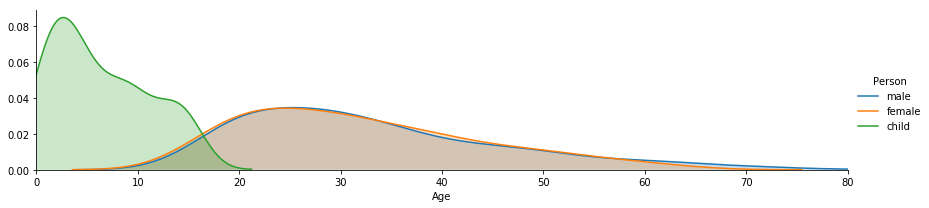

In [18]:
# kdeplot on ages and males vs female vs children
fig=sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

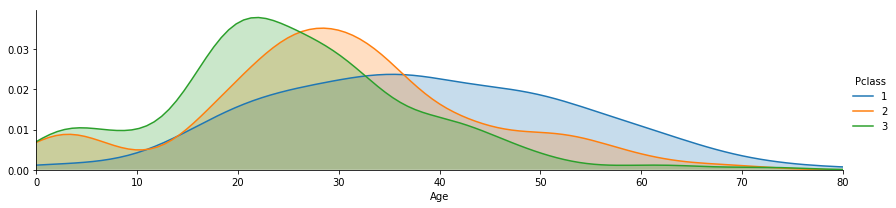

In [19]:
# kdeplot on ages and pclass
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [20]:
# Question 2 - what deck were the passengers on ,how does that relate to their class
# Cabin(deck) contains many null values,so drop all the null values
deck=titanic_df['Cabin'].dropna()

In [21]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

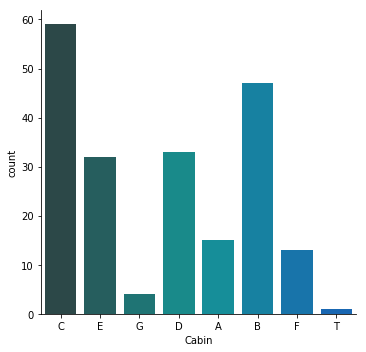

In [22]:
# grab all the first alphabet from the deck(cabin)
levels=[]

for level in deck:
    levels.append(level[0])
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']

sns.catplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

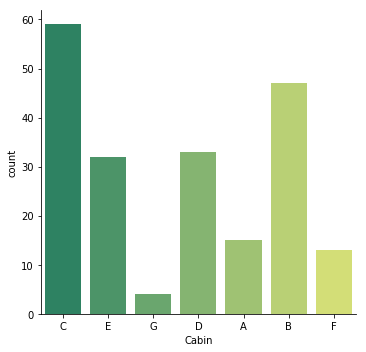

In [23]:
cabin_df=cabin_df[cabin_df.Cabin!='T']
sns.catplot('Cabin',data=cabin_df,palette='summer',kind='count')

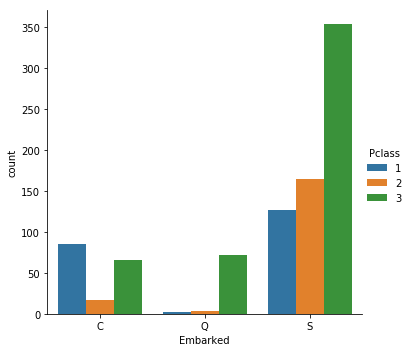

In [24]:
# Question 3
# where did the passenger come from?
sns.catplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

In [26]:
# Question 4
# who was alone and who was with family 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [28]:
titanic_df['Alone']=titanic_df['SibSp']+titanic_df['Parch']
# or 
# titanic_df['Alone']=titanic_df.SibSp+titanic_df.Parch
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [29]:
#set location of 'Alone' column 'with family' if value>0
#set location of 'Alone' column 'Alone' if value==0
titanic_df['Alone'].loc[titanic_df['Alone']>0]='with family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

C:\Users\rahul\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


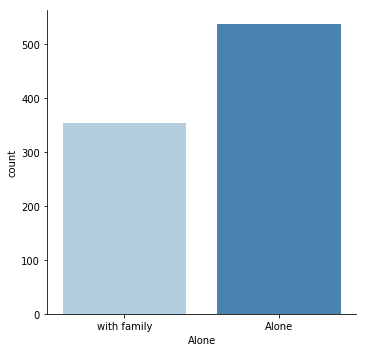

In [34]:
sns.catplot('Alone',data=titanic_df,palette='Blues',kind='count')

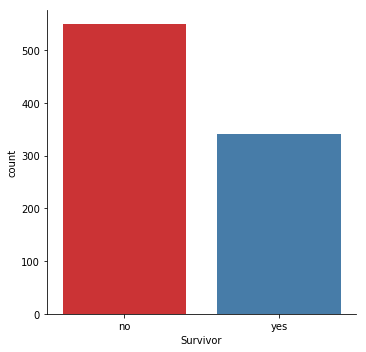

In [35]:
# total survied and not survived
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})
sns.catplot('Survivor',data=titanic_df,palette='Set1',kind='count')

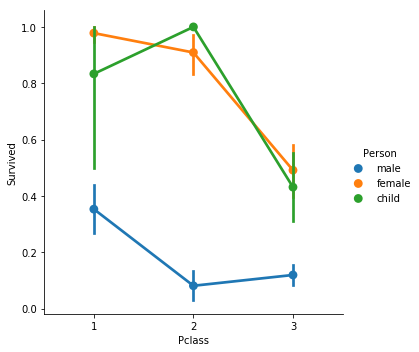

In [39]:
# which factors have different effects on their survival rates?
sns.catplot('Pclass','Survived',data=titanic_df,kind='point',hue='Person')

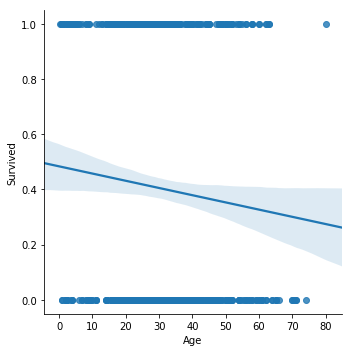

In [41]:
# age of people who survivede and who didn't
sns.lmplot('Age','Survived',data=titanic_df)

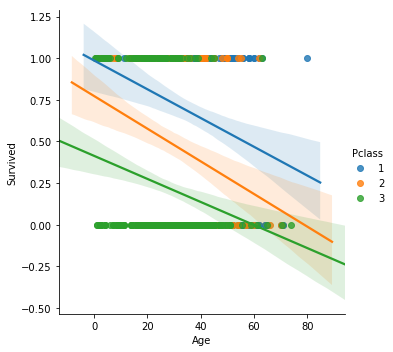

In [42]:
# age of people who survivede and who didn't based on 'Pclass'
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)

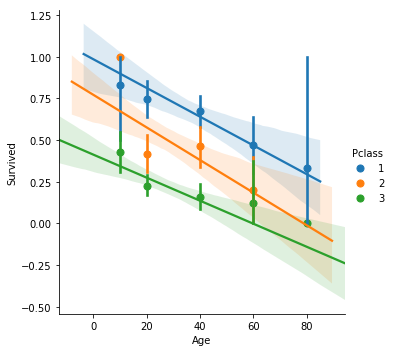

In [43]:
# age of people who survivede and who didn't based on 'Pclass' and age is grouped
generation=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generation)

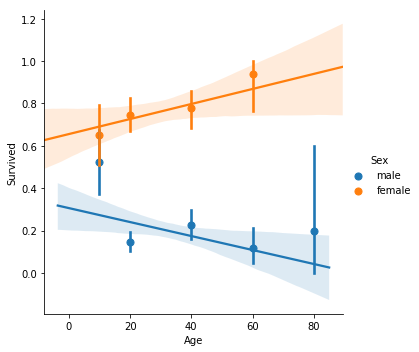

In [44]:
# age of people who survivede and who didn't based on 'Sex' and age is grouped
generation=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generation)